In [52]:
import findspark
findspark.init()

import wptools
import pyspark
import pyspark.sql
from pyspark.sql import *
import os.path
from pyspark.sql.functions import desc

from pyspark.sql import dataframe
from pyspark.sql import functions as F

from pyspark.sql import SparkSession
from pyspark import SparkContext
from pyspark.sql import SQLContext

spark = SparkSession.builder.getOrCreate()
sc = spark.sparkContext

from pyspark.sql import SQLContext
sqlContext = SQLContext(sc)
import seaborn as sns

In [7]:
DATA_DIR = '../data/data_processed/'

In [9]:
popularity_civil_conflict_ = spark.read.parquet(DATA_DIR+"popularity_civil_conflict.parquet")

popularity_military_conflict_ = spark.read.parquet(DATA_DIR+"popularity_military_conflict.parquet")

In [11]:
popularity_civil_conflict_.show(10)

+--------+--------------------+--------------+--------------+------+-----+--------------------+--------------------+
|      id|               title|    categories|article_lenght| views|death|            end_date|            location|
+--------+--------------------+--------------+--------------+------+-----+--------------------+--------------------+
| 1690078|   1967 Newark riots|civil conflict|         18540|225656|  +26|+1967-07-17T00:00...|[Jersey City (Q26...|
|39415364|2013 Israeli prot...|civil conflict|          4431|  1812| null|                null|                null|
|40496099|2013 Romanian pro...|civil conflict|         69406| 19639| null|                null|                null|
|53285609|2017 Anaheim prot...|civil conflict|          5030|   762| null|                null|                null|
|32071886|2011–13 Chilean s...|civil conflict|         40592| 54908| null|+2013-01-01T00:00...|                null|
|41693718|1962 Rangoon Univ...|civil conflict|         46680| 17

In [51]:
# Quantifying null values
# how many rows does the dataframe have?
mili_rows=popularity_military_conflict_.count()
from pyspark.sql.functions import isnan, when, count, col

mili_nan = popularity_military_conflict_.select([
    count(when(isnan(c) | col(c).isNull(), c)).alias(c) for c in popularity_military_conflict_.columns
]).toPandas()

mili_nan.head()

mili_percentages_nan = mili_nan*100/mili_rows
mili_percentages_nan.head()

,id,title,categories,article_lenght,views,death,end_date,location
0,0.0,0.0,0.0,0.0,0.0,98.383085,65.422886,26.741294


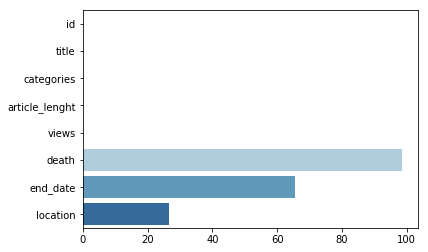

In [57]:
sns.barplot(data=mili_percentages_nan, palette='RdBu',orient='h')

In [58]:
popularity_military_conflict_.select('id','title','location').head(10)

[Row(id=274048, title='German revolutions of 1848–49', location='German Confederation (Q151624)'),
 Row(id=1352065, title='Manassas Station Operations (Stonewall Jackson)', location='Prince William County (Q183263)'),
 Row(id=8721744, title='Byzantine–Seljuq wars', location='Anatolia (Q51614)'),
 Row(id=9056625, title='Bombing of Wewak', location='Wewak (Q1017763)'),
 Row(id=11663850, title='Kurdish–Turkish conflict (1978–present)', location='[Eastern Anatolia Region (Q155542), Southeastern Anatolia Region (Q155638), Syria–Turkey border (Q3088996), Iraqi Kurdistan (Q205047)]'),
 Row(id=17932058, title='Sarposa prison attack of 2008', location='Kandahar (Q45604)'),
 Row(id=19729651, title='Iran–PJAK conflict', location='West Azarbaijan Province (Q134411)'),
 Row(id=29619836, title='Albanian revolt of 1910', location='Kosovo Vilayet (Q168501)'),
 Row(id=600391, title="'Urabi revolt", location='Khedivate of Egypt (Q127861)'),
 Row(id=3355600, title='Battle of Wahoo Swamp', location='Sumte

In [61]:
popularity_military_conflict_pd = popularity_military_conflict_.toPandas().set_index('id')
popularity_military_conflict_pd.head()

,title,categories,article_lenght,views,death,end_date,location
id,,,,,,,
274048,German revolutions of 1848–49,military conflict,64425,350410,None,None,German Confederation (Q151624)
1352065,Manassas Station Operations (Stonewall Jackson),military conflict,9293,15589,None,+1862-08-27T00:00:00Z,Prince William County (Q183263)
8721744,Byzantine–Seljuq wars,military conflict,51548,84530,None,None,Anatolia (Q51614)
9056625,Bombing of Wewak,military conflict,10852,12946,None,None,Wewak (Q1017763)
11663850,Kurdish–Turkish conflict (1978–present),military conflict,175579,498824,None,None,"[Eastern Anatolia Region (Q155542), Southeaste..."


In [67]:
# regex [^\(\d+\)\,\']
popularity_military_conflict_pd = popularity_military_conflict_.toPandas().set_index('id')
import re
loc_regex = re.compile(r"[^\(\d+\)\,\']")
loc_regex'([A-Z]\w{0,})'
popularity_military_conflict_pd['location'].str.extract(loc_regex, expand=True)


ValueError: pattern contains no capture groups

In [40]:
popularity_military_conflict_pd.shape

(804, 7)

In [39]:
popularity_military_conflict_pd.isna().sum() 

title               0
categories          0
article_lenght      0
views               0
death             791
end_date          526
location          215
dtype: int64